In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

columns of of $X$ are points. X is of shape $m \times n$. We want to cluster it into $k$ clusters

In [24]:
X = np.array([[0,1,1,-1],
              [1,0,1,-1]])

m, n = X.shape

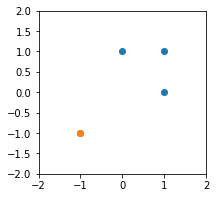

In [19]:
plt.figure(figsize=(3,3))
plt.plot(X[0,:],X[1,:],'o')
plt.plot(X[0,-1],X[1,-1],'o')
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.show()

Assign first two columns to one cluster and the last one to the second cluster.

Matrix $A$ is the ${0,1}$ assignment matrix of shape $n \times k$ where k is the number of clusters. 
$i_{th}$ row of A row of $A$ gives information of the cluster. Each row should have just one $1$, so that each column is only assigned to one cluster.

In [25]:
A = np.array([[1,0],
              [1,0],
              [1,0],
              [0,1]])

n, k = A.shape

$X A$ is $m \times k$, with $i_{th}$ column is the sum of the points in cluster $i$.

In [26]:
X @ A 

array([[ 2, -1],
       [ 2, -1]])

To find the centroid matrix $C$, we need to divide each col of $X A$ by the number of points in the corresponding cluster.

$ diag(1_n^T A)^+$ 

In [28]:
denom = np.linalg.pinv(np.diag(np.ones(n).T @ A))

In [31]:
C = X @ A @ denom
C

array([[ 0.66666667, -1.        ],
       [ 0.66666667, -1.        ]])

Distance Marix: $ D = X - C A^T $
Loss: $ Tr(D^T D) $

In [35]:
D = X - C @ A.T
loss = np.trace(D.T @ D)
loss

1.3333333333333335